In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
1,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
3,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
4,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400


In [3]:
#visualize the prices

In [4]:
#calculate moving average (for 50 days)
close_px = df['Adj Close']
mavg = close_px.rolling(window=50).mean()
mavg.tail()

246    203.761272
247    203.914720
248    204.141952
249    204.510957
250    204.795282
Name: Adj Close, dtype: float64

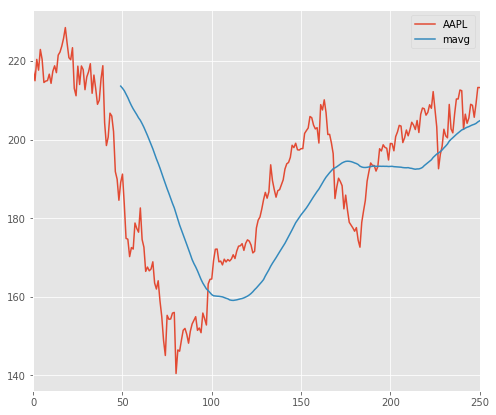

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
#import matplotlib as mpl
plt.rc('figure', figsize=(8, 7))
#plt.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [6]:
#prepare pre-train data
df_prices = df['Adj Close']
df_prices.head()

0    217.918411
1    214.993759
2    220.429443
3    217.691925
4    222.950317
Name: Adj Close, dtype: float64

In [7]:
dfreg = df.loc[:,['Adj Close', 'Volume','Date']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open'] / df['Open']) * 100
dfreg.head()

,Adj Close,Volume,Date,HL_PCT,PCT_change
0,217.918411,37619800,2018-09-07,2.105733,22030.0003
1,214.993759,39516500,2018-09-10,2.464162,21733.0002
2,220.429443,35749000,2018-09-11,3.457675,22285.0006
3,217.691925,49278700,2018-09-12,2.334104,22007.0007
4,222.950317,41706400,2018-09-13,2.552890,22541.0004


In [8]:
import math
from sklearn import preprocessing

In [9]:
#we gonna predict 'Adj Close' 
#seperate the 1% of data to predict (assuming they are real price which is also ourtest data)
forecast_out = int(math.ceil(0.01 * len(dfreg)))   #just a number
forecast_col = 'Adj Close'
#clear space for predicting price
dfreg['predict'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['predict','Date'], 1))
#scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
#find the Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
#separate label and identify it as y
y = np.array(dfreg['predict'])
#y for train
y = y[:-forecast_out]

In [10]:
#import linear_model to predict the future price
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [11]:
#train data
reg.fit(X, y)
confidence_reg = reg.score(X, y)
print(confidence_reg)

0.9185709563102327


In [12]:
#predict forecast value (1% that we've already separated)
forecast_set = reg.predict(X_lately)
forecast_set

array([210.19406824, 213.97703164, 214.11640636])

In [13]:
dfreg['predict'].tail()
#dfreg['predict'] = np.nan

246    213.279999
247    213.259995
248           NaN
249           NaN
250           NaN
Name: predict, dtype: float64

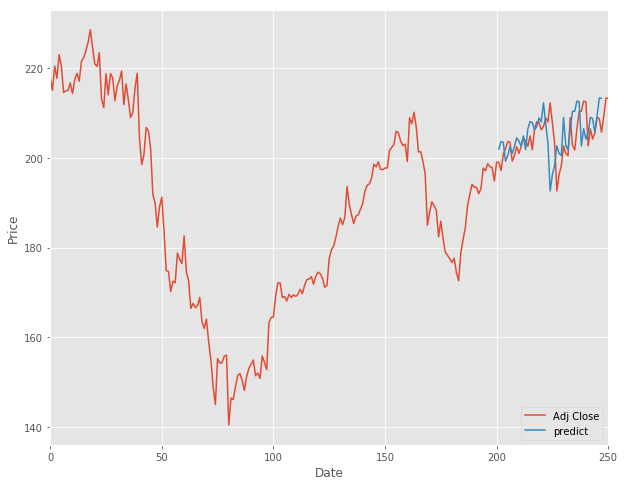

In [14]:
plt.rc('figure', figsize=(10, 8))
dfreg['Adj Close'].plot()
dfreg['predict'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
#try with quadratic regression 2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
poly2 = make_pipeline(PolynomialFeatures(2), Ridge())
poly2.fit(X,y)
confidence_poly2 = poly2.score(X, y)
print(confidence_poly2)

0.9227547129758302


In [16]:
forecast_set2 = poly2.predict(X_lately)
forecast_set2

array([208.97975202, 211.20562307, 212.33414877])

In [17]:
dfreg['predict'].tail()
#dfreg['predict'] = np.nan

246    213.279999
247    213.259995
248           NaN
249           NaN
250           NaN
Name: predict, dtype: float64

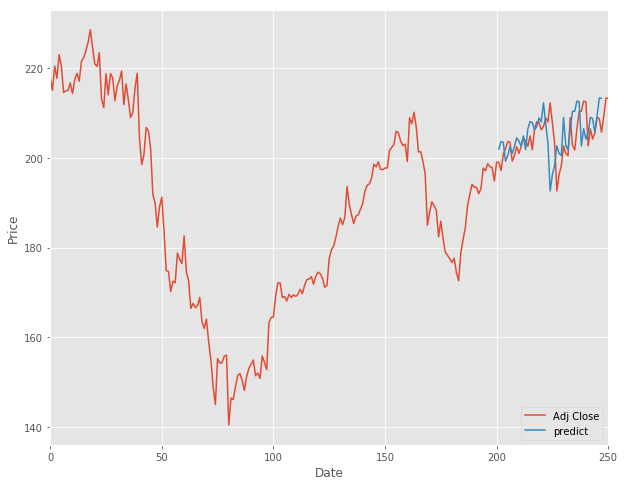

In [18]:
plt.rc('figure', figsize=(10, 8))
dfreg['Adj Close'].plot()
dfreg['predict'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
#try with quadratic regression 3
poly3 = make_pipeline(PolynomialFeatures(3), Ridge())
poly3.fit(X,y)
confidence_poly3 = poly3.score(X, y)
print(confidence_poly3)

0.9273751545059433


In [20]:
forecast_set3 = poly3.predict(X_lately)
forecast_set3

array([208.88342541, 210.91432224, 212.11823976])

In [21]:
dfreg['predict'].tail()
#dfreg['predict'] = np.nan

246    213.279999
247    213.259995
248           NaN
249           NaN
250           NaN
Name: predict, dtype: float64

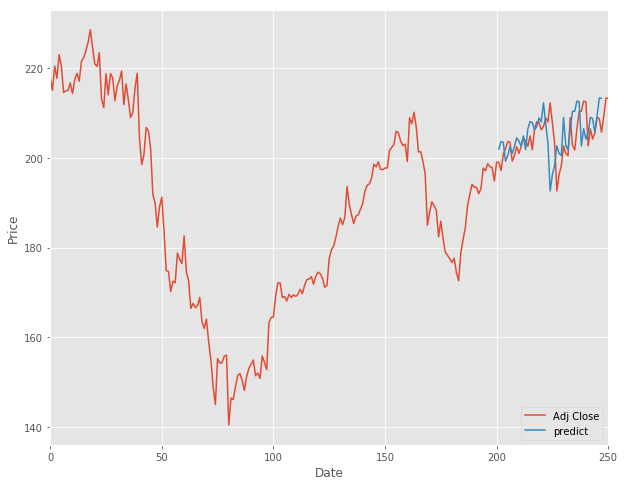

In [22]:
plt.rc('figure', figsize=(10, 8))
dfreg['Adj Close'].plot()
dfreg['predict'].tail(50).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()